In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
ORCA_04_2023=pd.read_csv(r"/Users/shakibanaderian/Desktop/Research/ORCA card/kcm_ridership/arsalan/TAZ.csv")

In [3]:
PSRC_2018=pd.read_csv(r"/Users/shakibanaderian/Desktop/Research/ORCA card/PSRC trip data/TAZ_PSRC.csv")

In [4]:
ORCA_04_2023=ORCA_04_2023.sort_values(['Origin','Destination']).reset_index()
ORCA_04_2023

,index,OD Pairs,Origin,Destination,Flows
0,224207,"(1.0, 256.0)",1.0,256.0,1
1,224204,"(1.0, 320.0)",1.0,320.0,1
2,224203,"(1.0, 435.0)",1.0,435.0,6
3,224208,"(1.0, 437.0)",1.0,437.0,3
4,224201,"(1.0, 455.0)",1.0,455.0,15
...,...,...,...,...,...
241913,193716,"(3436.0, 3399.0)",3436.0,3399.0,6
241914,193700,"(3436.0, 3400.0)",3436.0,3400.0,7
241915,193745,"(3436.0, 3435.0)",3436.0,3435.0,2
241916,193722,"(3436.0, 3436.0)",3436.0,3436.0,4


In [5]:
PSRC_2018

,otaz,dtaz,count
0,1,8,1
1,1,9,1
2,1,37,1
3,1,43,1
4,1,80,1
...,...,...,...
280600,3951,2070,3
280601,3951,2071,1
280602,3951,2077,2
280603,3951,2079,1


In [6]:
PSRC_2018['dtaz'].nunique()

3391

In [7]:
ORCA_04_2023['Destination'].nunique()

2342

In [8]:
max(PSRC_2018['dtaz'])


3951

In [9]:
max(ORCA_04_2023['Destination'])

3436.0

In [10]:
max(PSRC_2018['count'])


212

In [11]:
max(ORCA_04_2023['Flows'])


15436

In [12]:
15436/60

257.26666666666665

In [13]:
sum(PSRC_2018['count'])


462128

In [14]:
sum(ORCA_04_2023['Flows'])


3739588

In [15]:
3739588/60

62326.46666666667

Keeping Only King County:


In [16]:
PSRC_2018.shape

(280605, 3)

In [17]:
PSRC_2018 = PSRC_2018.drop(PSRC_2018[PSRC_2018['otaz'] > 2088].index)

In [18]:
PSRC_2018 = PSRC_2018.drop(PSRC_2018[PSRC_2018['dtaz'] > 2088].index)

In [19]:
PSRC_2018.shape

(203224, 3)

In [20]:
ORCA_04_2023.shape

(241918, 5)

In [21]:
ORCA_04_2023 = ORCA_04_2023.drop(ORCA_04_2023[ORCA_04_2023['Origin'] > 2088].index)

In [22]:
ORCA_04_2023 = ORCA_04_2023.drop(ORCA_04_2023[ORCA_04_2023['Destination'] > 2088].index)

In [23]:
ORCA_04_2023.shape

(177157, 5)

In [24]:
len(list(PSRC_2018['count']))

203224

(0.0, 10.0)

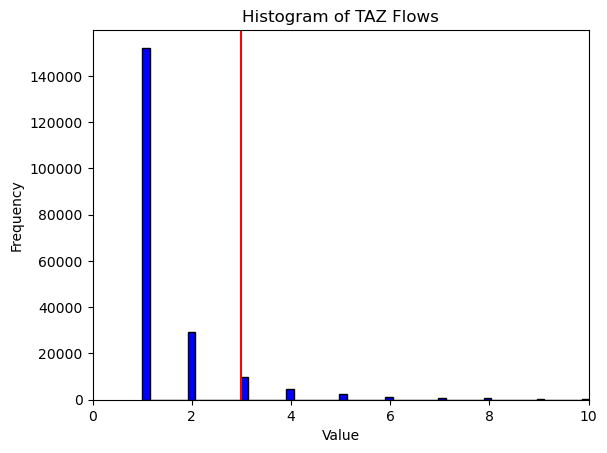

In [25]:
plt.hist(list(PSRC_2018['count']),bins=1000, color='blue', edgecolor='black')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of TAZ Flows')
# plt.axhline(y=100, color='red', linestyle='--', label='y=100')
plt.axvline(x=3, color='red', linestyle='-', label='y=100')
plt.xlim(0, 10)
# plt.ylim(0, 500000)

In [26]:
1500/365

4.109589041095891

In [27]:
PSRC_2018=PSRC_2018.sort_values(['count','otaz','dtaz']).reset_index()

In [28]:
round(.8*PSRC_2018.shape[0])

162579

In [29]:
PSRC_2018[round(.8*PSRC_2018.shape[0]):]

,index,otaz,dtaz,count
162579,76083,504,1302,2
162580,76093,504,1437,2
162581,76096,504,1455,2
162582,76100,504,1473,2
162583,76102,504,1482,2
...,...,...,...,...
203219,28963,302,282,117
203220,51015,432,433,117
203221,25140,282,302,144
203222,30944,304,302,148


In [39]:
PSRC_2018_all=PSRC_2018.sort_values(['otaz','dtaz'])

In [40]:
PSRC_2018_all=PSRC_2018_all.drop(['index'],axis=1)

In [41]:
PSRC_2018_all

,otaz,dtaz,count
0,1,8,1
1,1,9,1
2,1,37,1
3,1,43,1
4,1,80,1
...,...,...,...
152159,2088,978,1
152160,2088,1037,1
152161,2088,1181,1
152162,2088,1579,1


In [33]:
import warnings
warnings.filterwarnings("ignore")

In [34]:
for i in range(2088):
    for j in range(2088):
        if ((PSRC_2018_all['otaz'] == i + 1) & (PSRC_2018_all['dtaz'] == j + 1)).any():
            continue
        else:
            newrow={'otaz':i+1,'dtaz':j+1,'count':0}
            PSRC_2018_all=PSRC_2018_all.append(newrow, ignore_index=True)

KeyboardInterrupt: 

In [36]:
all_combinations = pd.DataFrame([(i + 1, j + 1) for i in range(2088) for j in range(2088)], columns=['otaz', 'dtaz'])

In [37]:
all_combinations

,otaz,dtaz
0,1,1
1,1,2
2,1,3
3,1,4
4,1,5
...,...,...
4359739,2088,2084
4359740,2088,2085
4359741,2088,2086
4359742,2088,2087


In [38]:
2088**2

4359744

In [42]:
missing_combinations = pd.merge(all_combinations, PSRC_2018_all, on=['otaz', 'dtaz'], how='left', indicator=True)

In [43]:
missing_combinations

,otaz,dtaz,count,_merge
0,1,1,NaN,left_only
1,1,2,NaN,left_only
2,1,3,NaN,left_only
3,1,4,NaN,left_only
4,1,5,NaN,left_only
...,...,...,...,...
4359739,2088,2084,NaN,left_only
4359740,2088,2085,NaN,left_only
4359741,2088,2086,NaN,left_only
4359742,2088,2087,NaN,left_only


In [44]:
PSRC_2018_zero = missing_combinations[missing_combinations['_merge'] == 'left_only'][['otaz', 'dtaz']]

In [46]:
PSRC_2018_zero['count'] = 0

In [47]:
PSRC_2018_zero

,otaz,dtaz,count
0,1,1,0
1,1,2,0
2,1,3,0
3,1,4,0
4,1,5,0
...,...,...,...
4359739,2088,2084,0
4359740,2088,2085,0
4359741,2088,2086,0
4359742,2088,2087,0


In [48]:
PSRC_2018_zero.shape[0]+PSRC_2018.shape[0]

4359744

In [49]:
2088**2

4359744

In [50]:
PSRC_2018_all = pd.concat([PSRC_2018_all, PSRC_2018_zero], ignore_index=True)

In [51]:
PSRC_2018_all.shape[0]

4359744

In [53]:
PSRC_2018_all=PSRC_2018_all.sort_values(['otaz','dtaz','count'])

In [54]:
PSRC_2018_all

,otaz,dtaz,count
203224,1,1,0
203225,1,2,0
203226,1,3,0
203227,1,4,0
203228,1,5,0
...,...,...,...
4359739,2088,2084,0
4359740,2088,2085,0
4359741,2088,2086,0
4359742,2088,2087,0


In [61]:
PSRC_sparse=pd.concat([PSRC_2018_zero, PSRC_2018[:round(.8*PSRC_2018.shape[0])]], ignore_index=True)

In [64]:
PSRC_sparse=PSRC_sparse.drop(['index'],axis=1)

KeyError: "['index'] not found in axis"

In [66]:
PSRC_sparse=PSRC_sparse.reset_index()

In [67]:
PSRC_sparse

,index,otaz,dtaz,count
0,0,1,1,0
1,1,1,2,0
2,2,1,3,0
3,3,1,4,0
4,4,1,5,0
...,...,...,...,...
4319094,4319094,504,1168,2
4319095,4319095,504,1226,2
4319096,4319096,504,1249,2
4319097,4319097,504,1250,2
